<a href="https://colab.research.google.com/github/manirajanvn/Road-Segmentation/blob/main/fastai_road_damage_coco.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook

     |████████████████████████████████| 720 kB 5.3 MB/s 
     |████████████████████████████████| 46 kB 4.2 MB/s 
     |████████████████████████████████| 1.2 MB 40.8 MB/s 
     |████████████████████████████████| 189 kB 46.9 MB/s 
     |████████████████████████████████| 56 kB 4.4 MB/s 
     |████████████████████████████████| 51 kB 298 kB/s 


In [2]:
import fastbook
fastbook.setup_book()

Mounted at /content/gdrive


In [3]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [4]:
from fastbook import *

In [5]:
BASE_DIR = "/content/gdrive/MyDrive/Datasets/Road/coc_download/"

In [6]:
from fastai.vision.all import *
from fastai.basics import *
from fastai.callback.all import *

In [7]:
path = Path(BASE_DIR)

In [8]:
fnames = get_image_files(path/"image")

In [9]:
fnames

(#448) [Path('/content/gdrive/MyDrive/Datasets/Road/coc_download/image/00000000.jpg'),Path('/content/gdrive/MyDrive/Datasets/Road/coc_download/image/00000004.jpg'),Path('/content/gdrive/MyDrive/Datasets/Road/coc_download/image/00000005.jpg'),Path('/content/gdrive/MyDrive/Datasets/Road/coc_download/image/00000003.jpg'),Path('/content/gdrive/MyDrive/Datasets/Road/coc_download/image/00000006.jpg'),Path('/content/gdrive/MyDrive/Datasets/Road/coc_download/image/00000009.jpg'),Path('/content/gdrive/MyDrive/Datasets/Road/coc_download/image/00000008.jpg'),Path('/content/gdrive/MyDrive/Datasets/Road/coc_download/image/00000013.jpg'),Path('/content/gdrive/MyDrive/Datasets/Road/coc_download/image/00000011.jpg'),Path('/content/gdrive/MyDrive/Datasets/Road/coc_download/image/00000019.jpg')...]

In [10]:
lbl_names = get_image_files(path/'mask')
fnames = get_image_files(path/'images')

In [11]:
lbl_names

(#448) [Path('/content/gdrive/MyDrive/Datasets/Road/coc_download/mask/00000003.png'),Path('/content/gdrive/MyDrive/Datasets/Road/coc_download/mask/00000058.png'),Path('/content/gdrive/MyDrive/Datasets/Road/coc_download/mask/00000024.png'),Path('/content/gdrive/MyDrive/Datasets/Road/coc_download/mask/00000027.png'),Path('/content/gdrive/MyDrive/Datasets/Road/coc_download/mask/00000026.png'),Path('/content/gdrive/MyDrive/Datasets/Road/coc_download/mask/00000008.png'),Path('/content/gdrive/MyDrive/Datasets/Road/coc_download/mask/00000045.png'),Path('/content/gdrive/MyDrive/Datasets/Road/coc_download/mask/00000039.png'),Path('/content/gdrive/MyDrive/Datasets/Road/coc_download/mask/00000033.png'),Path('/content/gdrive/MyDrive/Datasets/Road/coc_download/mask/00000049.png')...]

In [12]:
def n_codes(fnames, is_partial=True):
  "Gather the codes from a list of `fnames`"
  vals = set()
  if is_partial:
    random.shuffle(fnames)
    fnames = fnames[:10]
  for fname in fnames:
    msk = np.array(PILMask.create(fname))
    for val in np.unique(msk):
      if val not in vals:
        vals.add(val)
  vals = list(vals)
  p2c = dict()
  for i,val in enumerate(vals):
    p2c[i] = vals[i]
  return p2c

In [13]:
vals = n_codes(lbl_names)
vals

{0: 0, 1: 255}

In [ ]:
def get_msk(fn, pix2class):
  "Grab a mask from a `filename` and adjust the pixels based on `pix2class`"
  fn = path/'mask'/f'{fn.stem}.png'
  msk = np.array(PILMask.create(fn))
  mx = np.max(msk)
  for i, val in enumerate(pix2class):
    msk[msk==pix2class[i]] = val
  return PILMask.create(msk)

In [14]:
codes = ['good', 'damage']

In [15]:
def get_my_y(fname:Path): 
  fn = path/'mask'/f'{fname.stem}.png'
  msk = np.array(PILMask.create(fn))
  mx = np.max(msk)
  for i, val in enumerate(vals):
    msk[msk==vals[i]] = val
  return PILMask.create(msk)

In [16]:
ds = DataBlock(blocks=(ImageBlock, MaskBlock(codes)),
                   get_items=get_image_files,
                   splitter=RandomSplitter(),
                   get_y=get_my_y,
                   item_tfms=Resize(224),
                   batch_tfms=[Normalize.from_stats(*imagenet_stats)])

In [17]:
dls = ds.dataloaders(path/'image', bs=4)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


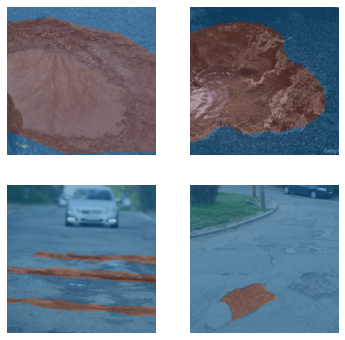

In [18]:
dls.show_batch()

In [19]:
learn = unet_learner(dls, resnet50)

/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth


  0%|          | 0.00/97.8M [00:00<?, ?B/s]

In [21]:
learn = learn.load('/content/gdrive/MyDrive/Datasets/Road/coc_download/model')


In [ ]:
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,0.118754,0.243289,07:37


/usr/local/lib/python3.7/dist-packages/torch/_tensor.py:1051: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  ret = func(*args, **kwargs)


epoch,train_loss,valid_loss,time
0,0.097608,0.201804,07:42
1,0.090736,0.218217,07:47
2,0.092101,0.490275,07:47
3,0.090117,0.328276,07:49
4,0.085986,0.290137,07:48
5,0.075943,0.226579,07:43
6,0.070845,0.274834,07:42


epoch,train_loss,valid_loss,time
0,0.097608,0.201804,07:42
1,0.090736,0.218217,07:47
2,0.092101,0.490275,07:47
3,0.090117,0.328276,07:49
4,0.085986,0.290137,07:48
5,0.075943,0.226579,07:43
6,0.070845,0.274834,07:42
7,0.067611,0.248858,07:47
8,0.060711,0.231506,07:51
9,0.053041,0.231375,07:51


In [ ]:
learn.save('/content/gdrive/MyDrive/Datasets/Road/coc_download/model')

Path('/content/gdrive/MyDrive/Datasets/Road/coc_download/model.pth')

In [27]:
pred = learn.predict('/content/1.PNG')

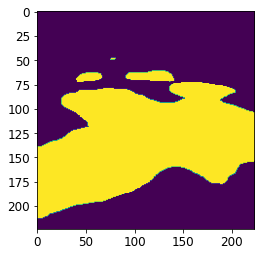

In [28]:
plt.imshow(pred[0])

In [29]:
pred = learn.predict('/content/1.PNG')
plt.imsave('15.png', pred[0])

In [30]:
import cv2 as cv

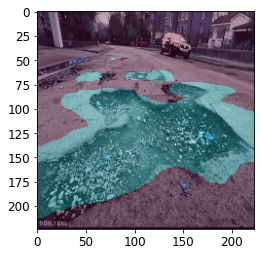

In [31]:
img1 = cv.imread('1.PNG')
img2 = cv.imread('15.png')

img1=cv.resize(img1, (224,224))
img2=cv.resize(img2, (224,224))

result = cv.addWeighted(img1, 0.7, img2, 0.3, 0)
plt.imshow(result)

In [ ]:
learn.export()

In [ ]:
%cp -av "/content/export.pkl" "/content/gdrive/MyDrive/Datasets/Road/coc_download"

'/content/export.pkl' -> '/content/gdrive/MyDrive/Datasets/Road/coc_download/export.pkl'
